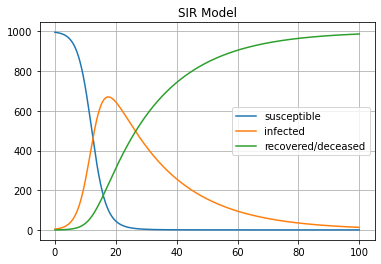

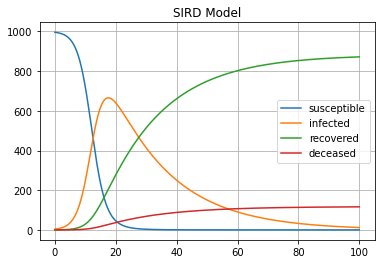

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# SIR Model
def SIR(t,y,p):
    N = np.sum(y)
    return np.array([
        - p[0] * y[0] * y[1] / N,
        p[0] * y[0] * y[1] / N - p[1] * y[1],
        p[1] * y[1]
    ])

# SIRD Model
def SIRD(t,y,p):
    N = np.sum(y)
    return np.array([
        -p[0] * y[0] * y[1] / N,
        p[0] * y[0] * y[1] / N - p[1] * y[1] - p[2] * y[1],
        p[1] * y[1],
        p[2] * y[1]
    ])

# Runge-Kutta Method 4th order
def RK4(t0, y0, h, f, n, **kwargs):
    y = np.empty((n + 1, len(y0)),dtype=np.float64)
    y[0,:] = y0
    t = np.arange(n + 1) * h + t0
    param = kwargs.get("parameters",None)

    for i in range(n):
        k1 = f(t[i], y[i,:], param)
        k2 = f(t[i] + h / 2, y[i,:] + h / 2 * k1, param)
        k3 = f(t[i] + h / 2, y[i,:] + h / 2 * k2, param)
        k4 = f(t[i] + h, y[i,:] + h * k3, param)
        y[i + 1,:] = y[i,:] + h * (k1 + 2 * k2 + 2 * k3 + k4) / 6
    return t, y

def SIR_Model_Values():
    infected = 4
    susceptible = 996

    infection_rate = 0.5
    recovery_rate = 0.05
    
    y0 = np.array([susceptible,infected,0])
    t0 = 0
    tn = 100
    n = 1000
    h = (tn-t0)/n

    # Parameters of SIR Model
    p = [infection_rate,recovery_rate]

    t,y = RK4(0, y0, h, SIR, n, parameters=p)

    fig,ax = plt.subplots()
    ax.plot(t,y)
    ax.set_title(f"SIR Model")
    ax.legend(["susceptible", "infected", "recovered/deceased"], loc="center right")
    ax.grid()
    plt.show()

def SIRD_Model_Values():
    infected = 4
    susceptible = 996

    infection_rate = 0.5
    recovery_rate = 0.045
    mortality_rate = 0.006
    ##############################
    y0 = np.array([susceptible, infected, 0, 0])
    t0 = 0
    tn = 100
    n = 1000
    h = (tn - t0) / n

    # Parameters of SIRD Model
    p = [infection_rate, recovery_rate, mortality_rate]

    t,y = RK4(0, y0, h, SIRD, n, parameters=p)

    fig,ax = plt.subplots()
    ax.plot(t,y)
    ax.set_title(f"SIRD Model")
    ax.legend(["susceptible", "infected", "recovered", "deceased"], loc="center right")
    ax.grid()
    plt.show()

if __name__ == "__main__":
    SIR_Model_Values()
    SIRD_Model_Values()
    